In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [45]:
df = pd.read_csv("pokemon.csv")
df.head(10)

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3     ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4     ['Blaze', 'Solar Power']         0.50           1.0             1.0   
5     ['Blaze', 'Solar Power']         0.25           1.0             1.0   
6     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
7     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
8     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
9  ['Shield Dust', 'Run Away']         1.00           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   
5               2.0            0.5            0.5           0.5   
6               2.0            1.0            1.0           0.5   
7               2.0            1.0            1.0           0.5   
8               2.0            1.0            1.0           0.5   
9               1.0            1.0            0.5           2.0   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   
5             1.0            1.0  ...             88.1               6   
6             1.0            1.0  ...             88.1               7   
7             1.0            1.0  ...             88.1               8   
8             1.0            1.0  ...             88.1               9   
9             2.0            1.0  ...             50.0              10   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   
5        159         115    100   fire  flying       90.5           1   
6         50          64     43  water     NaN        9.0           1   
7         65          80     58  water     NaN       22.5           1   
8        135         115     78  water     NaN       85.5           1   
9         20          20     45    bug     NaN        2.9           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  

[10 rows x 41 columns]

In [3]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

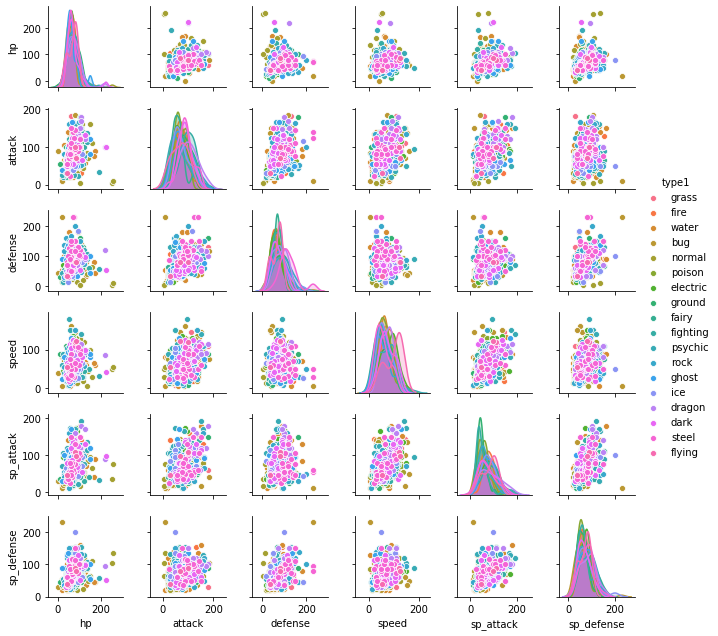

In [25]:
habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

# df.columns.hp.index
habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

sns.pairplot(habilidades, height=1.5, hue='type1');

In [46]:
habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

g = sns.pairplot(habilidades, height=1.8, hue='type1', diag_kind="kde")
g.map_lower(sns.kdeplot, levels=1, color=".2")

In [6]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
df.type1.value_counts(normalize = True)

water       0.142322
normal      0.131086
grass       0.097378
bug         0.089888
psychic     0.066167
fire        0.064919
rock        0.056180
electric    0.048689
ground      0.039950
poison      0.039950
dark        0.036205
fighting    0.034956
dragon      0.033708
ghost       0.033708
steel       0.029963
ice         0.028714
fairy       0.022472
flying      0.003745
Name: type1, dtype: float64

In [5]:
# Com esse comando pode-se observar as colunas incompletas, estas não serão utilizadas para a predição pois caso o código
# as vejam como relevante, quando elas estiverem faltando a uma maior chance de erro

df.isnull().sum().sort_values(ascending = False)[:5] 

type2              384
percentage_male     98
height_m            20
weight_kg           20
is_legendary         0
dtype: int64

In [47]:
# df.groupby("type1").against_bug.describe().sort_values(by = "mean", ascending = False) # n sei se precisa


# habilidades = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
# for i in habilidades:
#     df.groupby("type1").i.describe().sort_values(by = "mean", ascending = False)
# #     print(i)
#  pensar se vamos usar isso 

count      mean       std   min     25%  50%    75%  max
type1                                                             
dark       29.0  1.724138  0.797162  1.00  1.0000  2.0  2.000  4.0
grass      78.0  1.717949  0.771193  1.00  1.0000  2.0  2.000  4.0
psychic    53.0  1.716981  0.567632  1.00  1.0000  2.0  2.000  4.0
ground     32.0  1.062500  0.453481  0.50  1.0000  1.0  1.000  2.0
water     114.0  1.021930  0.384376  0.50  1.0000  1.0  1.000  2.0
ice        23.0  1.021739  0.352854  0.50  1.0000  1.0  1.000  2.0
rock       45.0  0.988889  0.419536  0.50  1.0000  1.0  1.000  2.0
dragon     27.0  0.944444  0.375534  0.50  0.7500  1.0  1.000  2.0
normal    105.0  0.895238  0.337520  0.50  0.5000  1.0  1.000  2.0
electric   39.0  0.871795  0.221180  0.50  0.7500  1.0  1.000  1.0
bug        72.0  0.826389  0.429213  0.50  0.5000  0.5  1.000  2.0
fighting   28.0  0.535714  0.176308  0.25  0.5000  0.5  0.500  1.0
steel      24.0  0.531250  0.297750  0.25  0.2500  0.5  0.625  1.0
ghost      27.0  0.527778  0.280224  0.25  0.2500  0.5  0.500  1.0
flying      3.0  0.500000  0.000000  0.50  0.5000  0.5  0.500  0.5
poison     32.0  0.492188  0.195559  0.25  0.5000  0.5  0.500  1.0
fairy      18.0  0.472222  0.080845  0.25  0.5000  0.5  0.500  0.5
fire       52.0  0.456731  0.154358  0.25  0.4375  0.5  0.500  1.0

In [48]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
y = df.type1
x = df.iloc[:, xlista]
x.head(2)
# sns.pairplot(x, height=1.5);

against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   

   against_ground  against_ice  against_normal  against_poison  \
0             1.0          2.0             1.0             1.0   
1             1.0          2.0             1.0             1.0   

   against_psychic  against_rock  against_steel  against_water  
0              2.0           1.0            1.0            0.5  
1              2.0           1.0            1.0            0.5

In [49]:
from sklearn.model_selection import train_test_split #biblioteca sklearn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [50]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier () 
m = model1.fit(x_train, y_train)

In [93]:

clf = x
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
x, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

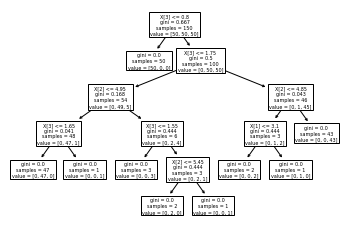

In [94]:
tree.plot_tree(clf)

In [51]:
resultado_train = m.score(x_train, y_train) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_train}')

Precisão do modelo utilizado na planilha de treinamento: 0.9546875


In [52]:
resultado_test = m.score(x_test, y_test)

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_test}')

Precisão do modelo utilizado na planilha de treinamento: 0.9254658385093167


In [53]:
Resultados = []
soma = 0

In [54]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = DecisionTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_train = m.score(x_test, y_test)
    
    Resultados.append(resultado_train)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name'])
# df1   
# m

In [55]:
print(df1.mean(), df1.min(), df1.max(), df1.std())


Column_Name    0.90646
dtype: float64 Column_Name    0.832298
dtype: float64 Column_Name    0.956522
dtype: float64 Column_Name    0.022001
dtype: float64


In [56]:
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)

y_pred = DecisionTree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bug       0.81      1.00      0.90        13
        dark       1.00      0.75      0.86         4
      dragon       0.62      1.00      0.77         5
    electric       0.86      0.67      0.75         9
       fairy       1.00      1.00      1.00         3
    fighting       0.38      0.75      0.50         4
        fire       0.83      1.00      0.91        10
      flying       0.00      0.00      0.00         2
       ghost       0.73      1.00      0.84         8
       grass       0.93      1.00      0.96        13
      ground       1.00      0.50      0.67        10
         ice       0.60      1.00      0.75         3
      normal       1.00      1.00      1.00        21
      poison       0.75      0.43      0.55         7
     psychic       1.00      0.80      0.89        10
        rock       0.67      0.75      0.71         8
       steel       0.50      0.50      0.50         2
       water       1.00    

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 
Matriz de Confusão: 
 [[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  1  0  5  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 1  0  0  0  0  3  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0  0  8  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0

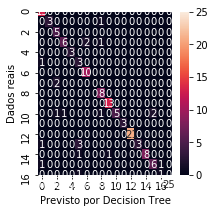

In [57]:
from sklearn.metrics import confusion_matrix # perguntar pra barbara

confusion_matrix( y_pred, y_test)

matriz_decision_tree = confusion_matrix(y_test, y_pred)
print(' ')
print ("Matriz de Confusão: \n", matriz_decision_tree)
# Para visualização:
plt.figure(figsize = (3, 3))
sns.heatmap(matriz_decision_tree, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto por Decision Tree')
plt.ylabel('Dados reais')
plt.show()

In [18]:
pd.crosstab( y_pred, y_test)

type1     bug  dark  dragon  electric  fairy  fighting  fire  flying  ghost  \
row_0                                                                         
bug        13     0       0         0      0         0     0       0      0   
dark        0     6       0         0      0         1     1       0      0   
dragon      0     0       4         0      0         0     0       1      0   
electric    0     0       0         8      0         0     2       0      0   
fairy       0     0       0         0      3         0     0       0      0   
fighting    0     0       0         0      0         5     0       0      0   
fire        0     0       1         0      0         0     9       0      0   
ghost       0     0       0         0      0         0     0       0      3   
grass       0     0       0         0      0         0     0       0      0   
ground      0     0       0         0      0         0     0       0      0   
ice         0     0       0         0      0         0     0       0      0   
normal      0     0       0         0      0         0     0       0      0   
poison      0     0       0         0      0         0     0       0      0   
psychic     0     0       0         0      0         0     0       0      0   
rock        0     0       0         0      0         0     0       0      0   
steel       0     0       0         0      0         0     0       0      0   
water       0     0       0         0      0         0     0       0      0   

type1     grass  ground  ice  normal  poison  psychic  rock  steel  water  
row_0                                                                      
bug           0       0    0       0       0        0     0      0      1  
dark          0       0    0       0       0        0     0      0      0  
dragon        0       0    0       0       0        0     0      0      0  
electric      0       0    0       0       0        0     0      0      0  
fairy         0       0    0       0       0        0     0      0      0  
fighting      0       0    0       0       0        0     0      0      0  
fire          0       0    0       0       0        0     2      0      0  
ghost         0       0    0       0       0        0     0      0      0  
grass        14       0    0       0       0        0     0      0      0  
ground        0       6    0       0       0        0     0      0      0  
ice           0       0    4       0       0        0     0      0      1  
normal        0       0    0      22       0        0     0      0      0  
poison        0       0    0       0       7        0     1      0      1  
psychic       0       0    0       0       0       11     0      0      0  
rock          0       1    0       0       0        0     5      0      1  
steel         0       1    0       0       0        0     2      7      0  
water         0       1    0       0       0        0     0      0     16

In [20]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

ValueError: could not convert string to float: 'psychic'

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1 2 0 1 0 0 0 1 2 1 1 3 1 1 0 1 1]
 [2 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 2]
 [0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 1 1 0 0 0 0 1 1 2 0 0]
 [0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 1 2 1 0 1 1 1]
 [0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0]
 [2 2 0 3 0 1 1 0 2 0 0 2 0 1 0 1 3]
 [0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0]
 [3 1 0 0 1 1 3 0 2 1 0 0 2 1 0 1 4]
 [0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 1 0]
 [0 0 1 0 1 0 0 0 2 0 0 1 1 1 0 2 1]
 [0 0 1 0 0 0 3 1 0 0 0 0 0 0 2 0 2]
 [0 1 2 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [3 1 1 2 1 0 2 0 1 2 0 4 0 3 1 2 1]]
              precision    recall  f1-score   support

         bug       0.07      0.06      0.07        16
        dark       0.00      0.00      0.00         8
      dragon       0.00      0.00      0.00         6
    electric       0.00      0.00      0.00         8
       fairy       0.00      0.00      0.00         5
    fighting       0.00      0.00      0.00  

In [ ]:
https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

In [58]:
# bibliotecas básicas para manipular qualquer modelo
import numpy as np
import pandas as pd 
import sklearn

# separador entre base de treino e de teste
from sklearn.model_selection import train_test_split

# ferramenta de normalização, essencial para o modelo
from sklearn.preprocessing import StandardScaler

# o modelo de classificação propriamente dito
from sklearn.neighbors import KNeighborsClassifier

# algumas funções para testar o modelo posteriormete:
# (explicadas no Turing Talks #11)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [59]:
# dataset = pd.read_csv('diabetes.csv')
# dataset.head()

In [60]:
# X = dataset.iloc[:,0:8] # todas as colunas, menos o diagnóstico 
# y = dataset['Outcome']  # resultados que nós queremos (respostas)

# reservamos 20% dos dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

In [61]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [62]:
# definindo o modelo
classifier = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [63]:
resultado_test = classifier.score(x_test, y_test)
resultado_test 

0.7577639751552795

In [32]:
https://medium.com/turing-talks/turing-talks-13-modelo-de-predi%C3%A7%C3%A3o-knn-3be880c9b9d1  Link do de cima

SyntaxError: invalid syntax (<ipython-input-32-3f00c336854a>, line 1)

In [68]:
df = pd.read_csv("pokemon.csv")
df.head(10)

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3     ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4     ['Blaze', 'Solar Power']         0.50           1.0             1.0   
5     ['Blaze', 'Solar Power']         0.25           1.0             1.0   
6     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
7     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
8     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
9  ['Shield Dust', 'Run Away']         1.00           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   
5               2.0            0.5            0.5           0.5   
6               2.0            1.0            1.0           0.5   
7               2.0            1.0            1.0           0.5   
8               2.0            1.0            1.0           0.5   
9               1.0            1.0            0.5           2.0   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   
5             1.0            1.0  ...             88.1               6   
6             1.0            1.0  ...             88.1               7   
7             1.0            1.0  ...             88.1               8   
8             1.0            1.0  ...             88.1               9   
9             2.0            1.0  ...             50.0              10   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   
5        159         115    100   fire  flying       90.5           1   
6         50          64     43  water     NaN        9.0           1   
7         65          80     58  water     NaN       22.5           1   
8        135         115     78  water     NaN       85.5           1   
9         20          20     45    bug     NaN        2.9           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  

[10 rows x 41 columns]

In [69]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
y = df.type1
x = df.iloc[:, xlista]

In [70]:
from sklearn.tree import ExtraTreeClassifier

model1 = ExtraTreeClassifier () 
m = model1.fit(x_train, y_train)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [72]:
resultado_train = m.score(x_train, y_train) 

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_train}')

Precisão do modelo utilizado na planilha de treinamento: 0.9390625


In [73]:
resultado_test = m.score(x_test, y_test)

print(f'Precisão do modelo utilizado na planilha de treinamento: {resultado_test}')

Precisão do modelo utilizado na planilha de treinamento: 0.9627329192546584


In [74]:
Resultados = []
soma = 0

In [75]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = ExtraTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_test = m.score(x_test, y_test)
    
    Resultados.append(resultado_test)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name2'])
# df1   
# m

In [76]:
print(df1.mean(), df1.min(), df1.max(), df1.std())


Column_Name2    0.898758
dtype: float64 Column_Name2    0.857143
dtype: float64 Column_Name2    0.950311
dtype: float64 Column_Name2    0.020399
dtype: float64
